### History of the data

The given data set consists of four files which detail the historical stock prices of stocks trading on the New York Stock Exchange (NYSE). The source of this data set is Kaggle. The four files are:<br>
<br>1) prices.csv: raw historical prices of stocks in the period 2010 to 2016
<br>2) prices-split-adjusted.csv: stock prices with adjustment for stock splits that have occured within given time period
<br>3) securities: general description of companies whose stock prices are listed
<br>4) fundamentals: metrics extracted from SEC filings of the listed companies<br>
<br>
Based on the type of analysis we would like to perform on the dataset, the input data file can be chosen. For this exercise, we attempt to predict the stock prices by applying prediction models. We will use the split-adjusted stock prices file as the input.
We also have the list of securities and the Fundamentals of underlying company which needs to be taken in to account.
### EDA

EDA is performed to understand the data that is to be analyzed.

In [3]:
# Pre-loaded code

# Importing common libraries and functions
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

### Loading the data set

The dataset that needs to be analyzed can then be uploaded onto a data frame, using the read_csv function of pandas library. We can also see a glimpse of the dataset, by calling the head function.

In [4]:
# Pre-loaded code

# creating a data frame and loading data
nyse=pd.read_csv('prices-split-adjusted.csv',sep=",")
columns = ['date', 'symbol', 'open', 'close', 'low',
         'high', 'volume']
nyse.columns = columns

# visualizing the head of the data set
nyse.head(5)

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


The dataset consists of stock prices. The ticker (NYSE) symbol of the stock, the date, opening price, closing price, highest price acheived within that day, lowest price within that day and total volume of stocks traded on that day are contained in this data set.

#### Exercise

Count the total number of stocks for which stock prices are available in the given dataset. (Hint: count the number of unique ticker symbols)

In [39]:
# Pre-loaded code

nyse.symbol.nunique()

501

# Technical Analysis
In this we will look at all the stock prices to see which stocks are more profitable.
Then perform some technical analysis on the price movements data to catch the trend - upward or downward (or sideway). This will help us make a crucial decision of whether to BUY or SELL (if we have already bought) the stock.

#### Stock Selection : Find the most profitable
For each of the stock find which is more profitable. In order to do this, we must load the securities dataset. Then use this list to iterate through the Adjusted prices dataset, figureout the % of returns for each stock in the 7 year peroiod from 01/01/2010 to 12/31/2016.

#### Exercise

Load the securities list in a stock_list variable and print the stock list.

In [9]:
stock_list=pd.read_csv('securities.csv',sep=",")
stock_list.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


Let us now figure out the percentage of returns for each stock in the 7 year peroiod from 01/01/2010 to 12/31/2016.

In [40]:
nyse.index=nyse.date
nyse

,date,symbol,open,close,low,high,volume
date,,,,,,,
2016-01-05,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
2016-01-12,2016-01-12,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0
2016-01-13,2016-01-13,WLTW,116.459999,112.849998,112.589996,117.070000,949600.0
2016-01-14,2016-01-14,WLTW,113.510002,114.379997,110.050003,115.029999,785300.0
2016-01-15,2016-01-15,WLTW,113.330002,112.529999,111.919998,114.879997,1093700.0


In [12]:
tmp_symb=stock_list['Ticker symbol']
numberOfRows = stock_list.shape[0]
stock_returns=stock_list
num=0
for symbol in tmp_symb:
    df_TMP=nyse[nyse['symbol'] == symbol]
    count=df_TMP.shape[0]
    if count >0:
        start=df_TMP.iloc[0]['close']
        end=df_TMP.iloc[count-1]['close']
        roi=(end-start)*100/start
        tmp_stocks_returns = stock_list[stock_list['Ticker symbol']==symbol]
        stock_returns.loc[stock_returns['Ticker symbol']==symbol, 'returns'] = roi
stock_returns.head()


,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK,returns
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740,115.092765
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,46.996440
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,78.302964
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,178.416917
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877,219.557531


Each industry (and sub industry) will have different norms for average returns. 
By grouping the stocks by industry we can make more informed decision on whethere a stock is performing well 
and in specific we whether the returns on stock is normal, high or low.  
Let us select a particular industry for further analysis. 
In this lab, we shall pick the "Internet Software & Services" sub industry.

In [42]:
#Sort the securities with returns % against each sub-industry and then select the "Internet Software & Services" sub industry
sorted_returns=stock_returns.sort_index(by= ['GICS Sub Industry','Security'], ascending=[True,False])
sorted_returns[sorted_returns['GICS Sub Industry']=='Internet Software & Services']
#sorted_returns

/home/mani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK,returns
157,EBAY,eBay Inc.,reports,Information Technology,Internet Software & Services,"San Jose, California",NaN,1065088,195.160847
500,YHOO,Yahoo Inc.,reports,Information Technology,Internet Software & Services,"Sunnyvale, California",NaN,1011006,126.140339
486,WU,Western Union Co,reports,Information Technology,Internet Software & Services,"Englewood, Colorado",NaN,1365135,13.776841
475,V,Visa Inc.,reports,Information Technology,Internet Software & Services,"San Francisco, California",2009-12-21,1403161,254.073056
470,VRSN,Verisign Inc.,reports,Information Technology,Internet Software & Services,"Dulles, Virginia",NaN,1014473,207.477769
444,TSS,Total System Services,reports,Information Technology,Internet Software & Services,"Columbus, Georgia",2008-01-02,721683,184.892515
397,CRM,Salesforce.com,reports,Information Technology,Internet Software & Services,"San Francisco, California",2008-09-15,1108524,265.998391
348,PAYX,Paychex Inc.,reports,Information Technology,Internet Software & Services,"Penfield, New York",NaN,723531,97.534072
322,NFLX,Netflix Inc.,reports,Information Technology,Internet Software & Services,"Los Gatos, California",2010-12-20,1065280,1520.418918
321,NTAP,NetApp,reports,Information Technology,Internet Software & Services,"Sunnyvale, California",NaN,1002047,3.158821


From the above analysis on percentage return on investments, it seems Netflix(NFLX) and Facebook(FB) are great value for money.
We zero in on these stocks and do further analysis on these stocks.


#### Exercise

Collect the stock price infromation for NetFlix and Facebook. Then perform Technical analysis for these stocks.

In [43]:
#Utility Functions for reading stocks data
import os
def symbol_to_path(symbol, base_dir=""):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

#SPY or S&P 500 index gives most reliable dates when stock market operates.
#So let us add it to our dataset to get the working day reference.
def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        df_temp = pd.read_csv(symbol_to_path('SPY'),index_col="Date",parse_dates=True,usecols=['Date','Adj Close'],na_values=['nan'])
        df_temp=df_temp.rename(columns={'Adj Close':'SPY'})
        df=df.join(df_temp)
        df=df.dropna()

    for symbol in symbols:
        df_temp = nyse[nyse['symbol']==symbol]
        df_temp = df_temp[['date','close']]
        df_temp = df_temp.set_index(['date'])
        df_temp=df_temp.rename(columns={'close':symbol})
        df=df.join(df_temp)
    
    return df



#Lets create a new DataFrame with time series.
# Define a date range
dates = pd.date_range('2010-01-01', '2016-12-31')

# Choose stock symbols to read
symbols = ['NFLX', 'FB']

# Get stock data
dfSTOCKS = get_data(symbols, dates)


In [44]:
dfSTOCKS

,SPY,NFLX,FB
2010-01-04,113.330002,7.640000,NaN
2010-01-05,113.629997,7.358572,NaN
2010-01-06,113.709999,7.617143,NaN
2010-01-07,114.190002,7.485714,NaN
2010-01-08,114.570000,7.614286,NaN
2010-01-11,114.730003,7.604286,NaN
2010-01-12,113.660004,7.481429,NaN
2010-01-13,114.620003,7.708571,NaN
2010-01-14,114.930000,7.284286,NaN
2010-01-15,113.639999,7.278572,NaN


### Rolling Mean
The rolling mean gives a better understanding of how the stock is performing over a periood of time.
Plot a graph to visualize the performance of the stock over the given time period.

In [24]:
def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    return pd.rolling_mean(values, window=window)

#### Exercise

Create a dataframe with just the Netflix prices and save it in variable dfNFLX from starting date. 
Similarly cretae a dataframe with just the Facebook prices and save it in variable dfFB from starting date. (Hint: Use row slicing using date range. Use Dataframe.dropna() to remove rows with Nan price value) 
You may remember FB and NFLX stocks are in dataframe dfSTOCKS.

In [29]:
dfNFLX=dfSTOCKS.ix['2010-01-01':'2016-12-31',['NFLX']]
dfFB=dfSTOCKS.ix['2011-01-01':'2016-12-31',['FB']]
dfFB=dfFB.dropna()

/home/mani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/mani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [30]:
#Utility function to plot the data from a list
def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    df1=df.ix[start_index:end_index,columns]
    plot_data(df1)
    

def plot_data(df,title="Stock Prices"):
    '''Plot stock prices'''
    ax = df.plot(title=title,fontsize=12)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    plt.show()


#### Exercise

Find the rolling mean and plot it against the stock for Netflix. Hint: Use the plot_selected function and get_rolling_mean function defined above.

/home/mani/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


AttributeError: module 'pandas' has no attribute 'rolling_mean'

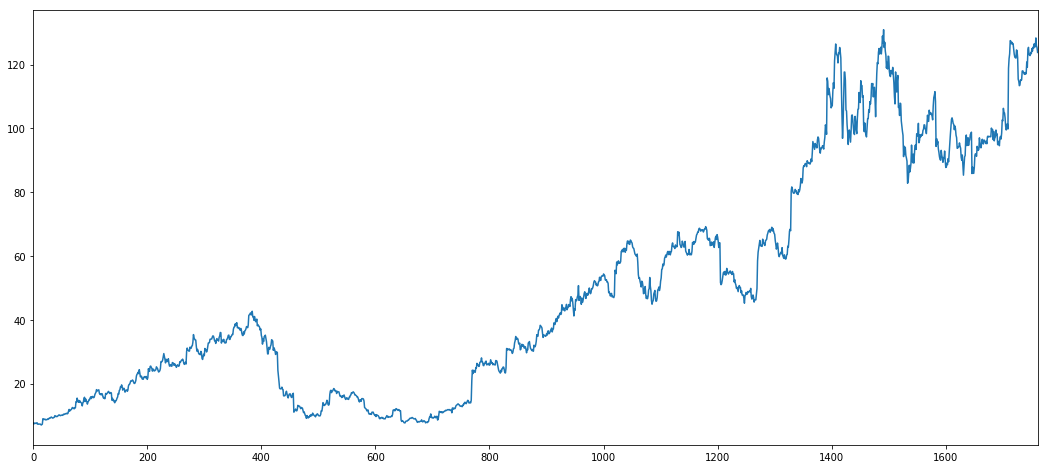

In [31]:
ax = plt.subplots(figsize=(18, 8))
sns.tsplot(data=dfNFLX['NFLX'])
rm_NFLX = get_rolling_mean(dfNFLX['NFLX'], window=20)
sns.tsplot(rm_NFLX)
sns.plt.show()

As you can see from above plot, the rolling mean is more smooth as it removes the noises in the daily price movement.
And it is evident that NETFLIX has been very profitable since late 2012. This is a good stock to analyze and buy.

### Bollinger Bands
Bollinger Bands can be used to measure the "highness" or "lowness" of the price relative to previous trades. Bollinger Bands are a volatility indicator.

The purpose of Bollinger Bands is to provide a relative definition of high and low. By definition, prices are high at the upper band and low at the lower band. This definition can aid in rigorous pattern recognition and is useful in comparing price action to the action of indicators to arrive at systematic trading decisions.

Here we take a band of +2σ to -2σ. This means:
Upper Band is 2* 20-period standard deviation above the moving average (MA + 2σ)
Lower Band is 2* 20-period standard deviation below the moving average (MA - 2σ)


In [32]:
def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    return pd.rolling_std(values, window=window)

def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    upper_band=rm + 2*rstd
    lower_band=rm - 2*rstd
    return upper_band, lower_band


We may also have to convert the data types of the given data in order to enable analysis and application of various functions and models.

In [33]:
# Converting data types
dfFB[['FB']].astype(float)
dfNFLX[['NFLX']].astype(float)

,NFLX
2010-01-04,7.640000
2010-01-05,7.358572
2010-01-06,7.617143
2010-01-07,7.485714
2010-01-08,7.614286
2010-01-11,7.604286
2010-01-12,7.481429
2010-01-13,7.708571
2010-01-14,7.284286
2010-01-15,7.278572


In [34]:
#rename columns FB,NFLX to close in respective dataframes

dfFB=dfFB.rename(columns={'FB':'close'})

dfNFLX=dfNFLX.rename(columns={'NFLX':'close'})


### Prdicting future price in Time Series stock data

When we train the model to predict future prices based on historical prices, we need to factor historical prices in to the training data.
We do this by using the rolling mean, bollinger value and n-day price momentum. Also match them against a price in the future (n days in to future). We do this by using the shift function in Dataframe.
1. Rolling Mean Value - A measure of the current price as a fraction of the rolling mean in a 20-day window.
2. Bollinger Value - This factors the extent of variance of the current price against the rolling mean for 20days as a factor of twice the standard deviation.
3. N-day Price Momentum -  How much has the price increased or decreeased in the last N-days (trend). (Current Price / Price before N-days) -1 

In [35]:
def get_bollinger_value(value, rm, rstd):
    """Return Bollinger value."""
    bollinger_value=(value - rm) / 2*rstd
    return bollinger_value

In [36]:
#Get Rolling Mean value, Bollinger Value

# 1. Compute Rolling Mean value and name that column as RMVAL
rm_FB = get_rolling_mean(dfFB, window=20)
rmValue_FB=(dfFB-rm_FB)/rm_FB
rmValue_FB=rmValue_FB.rename(columns={'close':'RMVAL'})

# 2. Compute rolling standard deviation
rstd_FB = get_rolling_std(dfFB, window=20)

# 3. Compute Bollinger Value and name that column as BOLLVAL
bv_FB = get_bollinger_value(dfFB, rm_FB, rstd_FB)
bv_FB=bv_FB.rename(columns={'close':'BOLLVAL'})

AttributeError: module 'pandas' has no attribute 'rolling_mean'

In [37]:
dfFB=dfFB.join(rmValue_FB['RMVAL'])
dfFB=dfFB.join(bv_FB['BOLLVAL'])

NameError: name 'rmValue_FB' is not defined

In [47]:
# N-day Momentum
#m -  number of days momentum
m=5
#-n, where n is the number of days in future for prediction
n=-1

start_index='2016-01-01'
end_index='2017-01-31'
#ts_full=dfFB.ix[start_index:end_index,['close','RMVAL','BOLLVAL']]
#ts_full['Ndays_MOM']=ts_full['close']/ts_full['close'].shift(m) -1
#ts_full['y_val']=ts_full['close'].shift(n)
#ts_full.head(10)
dfFB.loc[start_index:end_index,['close','RMVAL','BOLLVAL']]

/home/mani/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,close,RMVAL,BOLLVAL
2016-01-04,102.220001,NaN,NaN
2016-01-05,102.730003,NaN,NaN
2016-01-06,102.970001,NaN,NaN
2016-01-07,97.919998,NaN,NaN
2016-01-08,97.330002,NaN,NaN
2016-01-11,97.510002,NaN,NaN
2016-01-12,99.370003,NaN,NaN
2016-01-13,95.440002,NaN,NaN
2016-01-14,98.370003,NaN,NaN
2016-01-15,94.970001,NaN,NaN


In [19]:
#Lets take last 1 year for analysis
start_index='2016-01-01'
end_index='2016-12-31'
ts=ts_full.ix[start_index:end_index,['close','RMVAL','BOLLVAL','Ndays_MOM','y_val']]
ts=ts.dropna()
ts.head()

,close,RMVAL,BOLLVAL,Ndays_MOM,y_val
2016-01-04,102.220001,-0.027819,-1.953014,-0.026662,102.730003
2016-01-05,102.730003,-0.021363,-1.586690,-0.030209,102.970001
2016-01-06,102.970001,-0.017841,-1.378933,-0.039996,97.919998
2016-01-07,97.919998,-0.062177,-6.776358,-0.078140,97.330002
2016-01-08,97.330002,-0.064571,-8.796395,-0.070036,97.510002


### Splitting the data set into train and test data

While splitting this time series data set, we expect the model to predict future prices based on historical prices. Hence, based on the time dimension of the data set, the training data should be picked from the oldest stock prices and the latest segment should be selected as test data.

In [20]:
# Creating training data from first 80% of the data frame
split=int(ts.shape[0]*4/5)
train_set = ts[:split]
print('Training Set count is ' , len(train_set))

train_set.tail()

Training Set count is  200


,close,RMVAL,BOLLVAL,Ndays_MOM,y_val
2016-10-11,128.880005,0.001270,0.061328,0.005383,129.050003
2016-10-12,129.050003,0.002093,0.096903,0.004515,127.820000
2016-10-13,127.820000,-0.007254,-0.347972,-0.007146,127.879997
2016-10-14,127.879997,-0.006329,-0.311868,-0.008605,127.540001
2016-10-17,127.540001,-0.008543,-0.444121,-0.020731,128.570007


In [21]:
# Creating test data set from remaning 20% of the data frame
test_set = ts[split:]
test_set=test_set.dropna()
print('Test Set count is ' , len(test_set))

test_set.head()

Test Set count is  51


,close,RMVAL,BOLLVAL,Ndays_MOM,y_val
2016-10-18,128.570007,-0.000509,-0.026472,-0.002405,130.110001
2016-10-19,130.110001,0.011396,0.603673,0.008214,130.000000
2016-10-20,130.000000,0.010572,0.555142,0.017055,132.070007
2016-10-21,132.070007,0.025026,1.778529,0.032765,133.279999
2016-10-24,133.279999,0.032026,2.949350,0.045005,132.289993


### KNN Regression for future stock data
Next step is to use scikit-learn's KNN Regressor algorith to train the model with the price data, n-day momentum of stock prices, Bollinger Value, and Rolling Mean value. 

In [22]:
from sklearn.neighbors import KNeighborsRegressor
cols = ['close', 'RMVAL','BOLLVAL','Ndays_MOM']
cols2 = ['y_val']
trainArr = train_set.as_matrix(cols)
trainRes = train_set.as_matrix(cols2)
testArr = test_set.as_matrix(cols)
testRes = test_set.as_matrix(cols2)
knn = KNeighborsRegressor(n_neighbors=2,)
knn.fit(trainArr, trainRes) 


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

In [23]:
output = knn.predict(testArr)

result = pd.DataFrame(data=output[1:,1:],    # values
              index=output[1:,0],    # 1st column as index
              columns=output[0,1:]) 


In [24]:
test_set['y_pred'] = output
test_set.head()

,close,RMVAL,BOLLVAL,Ndays_MOM,y_val,y_pred
2016-10-18,128.570007,-0.000509,-0.026472,-0.002405,130.110001,128.465003
2016-10-19,130.110001,0.011396,0.603673,0.008214,130.000000,128.485001
2016-10-20,130.000000,0.010572,0.555142,0.017055,132.070007,128.485001
2016-10-21,132.070007,0.025026,1.778529,0.032765,133.279999,128.420002
2016-10-24,133.279999,0.032026,2.949350,0.045005,132.289993,129.020001


### Plot the test dtat set's future price Vs predicted data for future stock price

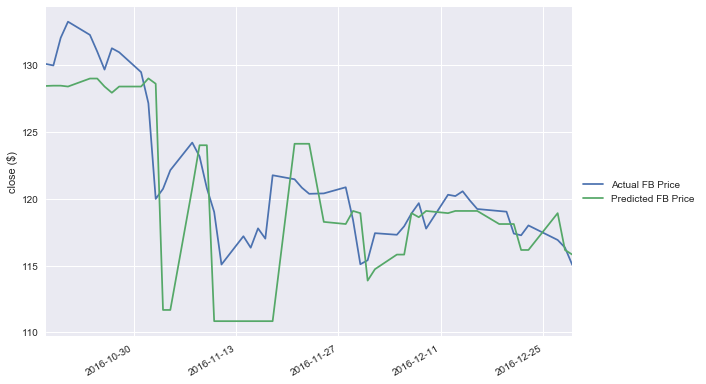

In [86]:
test_set.y_val.plot(label='Actual FB Price')
test_set.y_pred.plot(label='Predicted FB Price')
plt.legend(bbox_to_anchor=(1.25, .5))
plt.tight_layout()
plt.ylabel("close ($)")
sns.despine()
sns.plt.show()

As you can see from the above plot, the predicted values follow the same trend of the actual price (n days in to future).
### Calculate the Root Mean Square Error(RMSE) for the prediction

In [53]:
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(testRes, output)**0.5
print("RMSE is ", rmse)

RMSE is  4.0282820076


You can see the Root Mean Square Error(RMSE) for the prediction. We can tune the values for m,n, start_date, end_date to see how the model fits better with shorter duration of data (6months, or 3 months) , smaller values of m (N-day Momentum of price) or n (number of days in to future to predict the price) etc. 
